In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('../section27/height-weight.csv')
df.head()

Weight  Height
0      45     120
1      58     135
2      48     123
3      60     145
4      70     160

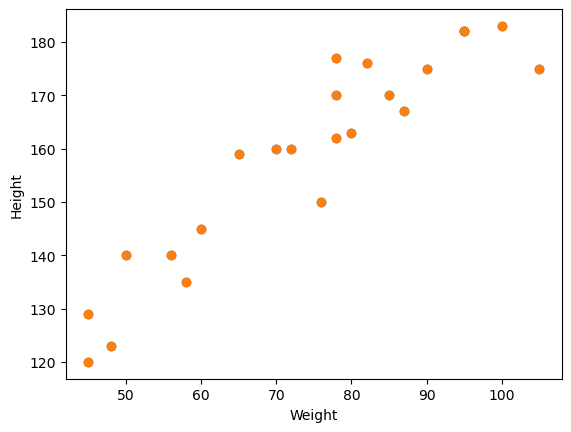

In [5]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [17]:
X=df[['Weight']]
y=df['Height']

In [27]:
X

Weight
0       45
1       58
2       48
3       60
4       70
5       78
6       80
7       90
8       95
9       78
10      82
11      95
12     105
13     100
14      85
15      78
16      50
17      65
18      76
19      87
20      45
21      56
22      72

In [19]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)

In [30]:
X_train

Weight
12     105
1       58
13     100
5       78
2       48
11      95
20      45
3       60
4       70
18      76
16      50
21      56
22      72
7       90
10      82
14      85
19      87
6       80

In [31]:
X.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23, 1), (18, 1), (5, 1), (18,), (5,))

In [32]:
# Standardize the dataset Train independent data
from sklearn.preprocessing import StandardScaler

In [33]:
scaler=StandardScaler()

In [35]:
X_train.head()

Weight
12     105
1       58
13     100
5       78
2       48

In [36]:
X_train = scaler.fit_transform(X_train)

In [37]:
X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [38]:
X_test=scaler.transform(X_test)

In [39]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

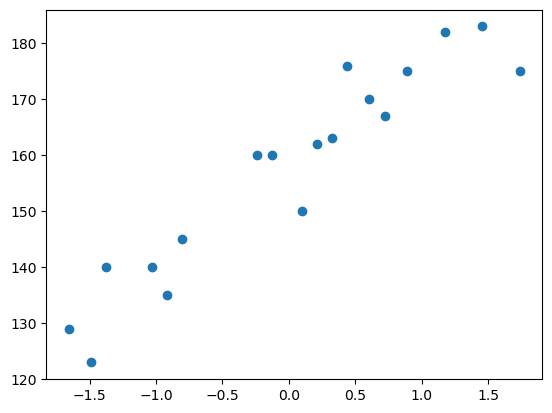

In [40]:
plt.scatter(X_train, y_train)
plt.show()

In [41]:
# Train the Simple Linear Regression Model.
from sklearn.linear_model import LinearRegression

In [42]:
regressor=LinearRegression()

In [43]:
regressor.fit(X_train, y_train)

LinearRegression()

In [44]:
regressor.coef_

array([17.03440872])

In [45]:
regressor.intercept_

157.5

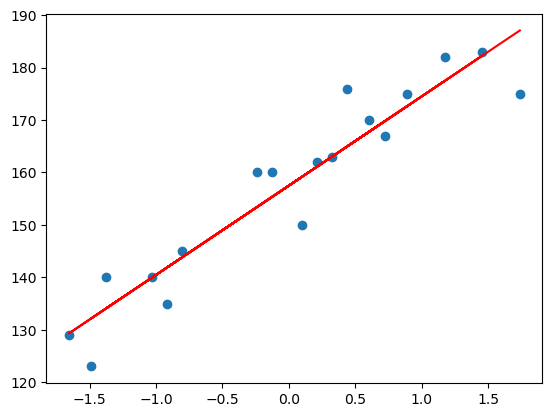

In [49]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), 'r')
plt.show()

#### Prediction of train data
1.predicted height output = intercept+coef_(Weights)
2.y_pred_train = 157.5 + 17.03(X_train)

#### Prediction of test data
1.predicted height output = intercept + coef_(Weights)
2. y_pred_test = 157.5 + 17.03(X_test)

In [51]:
y_pred_test=regressor.predict(X_test)

In [52]:
y_pred_test, y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

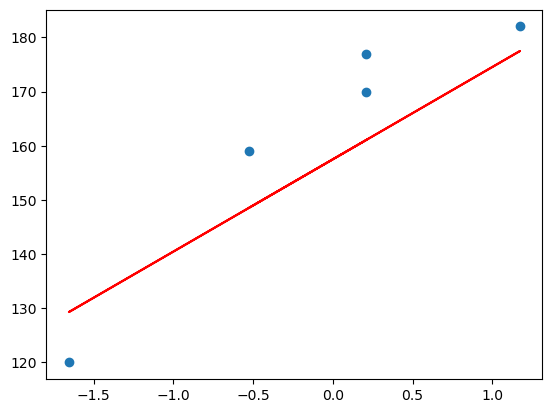

In [53]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test), 'r')
plt.show()

### Performance Metrics
### MSE, MAE, RMSE
### R square and adjusted R Square

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [57]:
mse=mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051654
9.822657814519227
10.477400726827076


In [58]:
from sklearn.metrics import r2_score
score=r2_score(y_test, y_pred_test)

In [59]:
score

0.7769869860423441

In [60]:
#adjusted R-squareed
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231254

In [61]:
regressor

LinearRegression()

In [62]:
# new data point weight is 80
scaled_weight = scaler.transform([[80]])
scaled_weight

d:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [65]:
scaled_weight[0]

array([0.32350772])

In [67]:
print("The height prediction for weight 80kg is :", regressor.predict([scaled_weight[0]]))

The height prediction for weight 80kg is : [163.01076266]


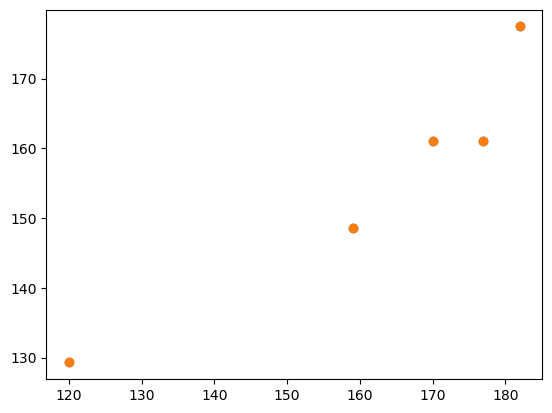

In [69]:
# Assumption 
# plot a scatter plot for the prediction
plt.scatter(y_test, y_pred_test)
plt.show()

In [70]:
# Residuals
residuals = y_test- y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

C:\Users\BKRK\AppData\Local\Temp\ipykernel_12952\2464497251.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde=True)


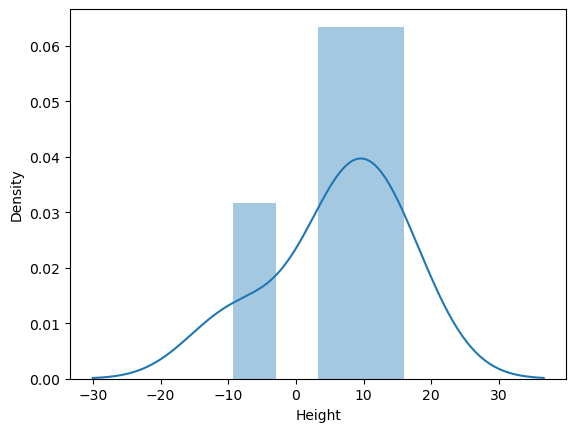

In [75]:
## plot residuals
sns.distplot(residuals, kde=True)
plt.show()

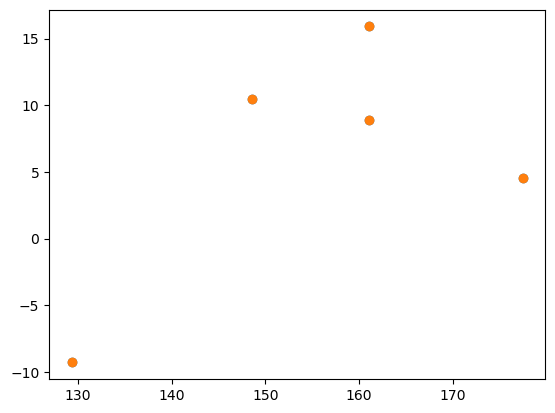

In [77]:
plt.scatter(y_pred_test, residuals)
plt.show()